In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from collections import Counter

# Load gambar

Total gambar yang di-load: 1269
Kategori: ['nantu', 'palapi', 'uru']


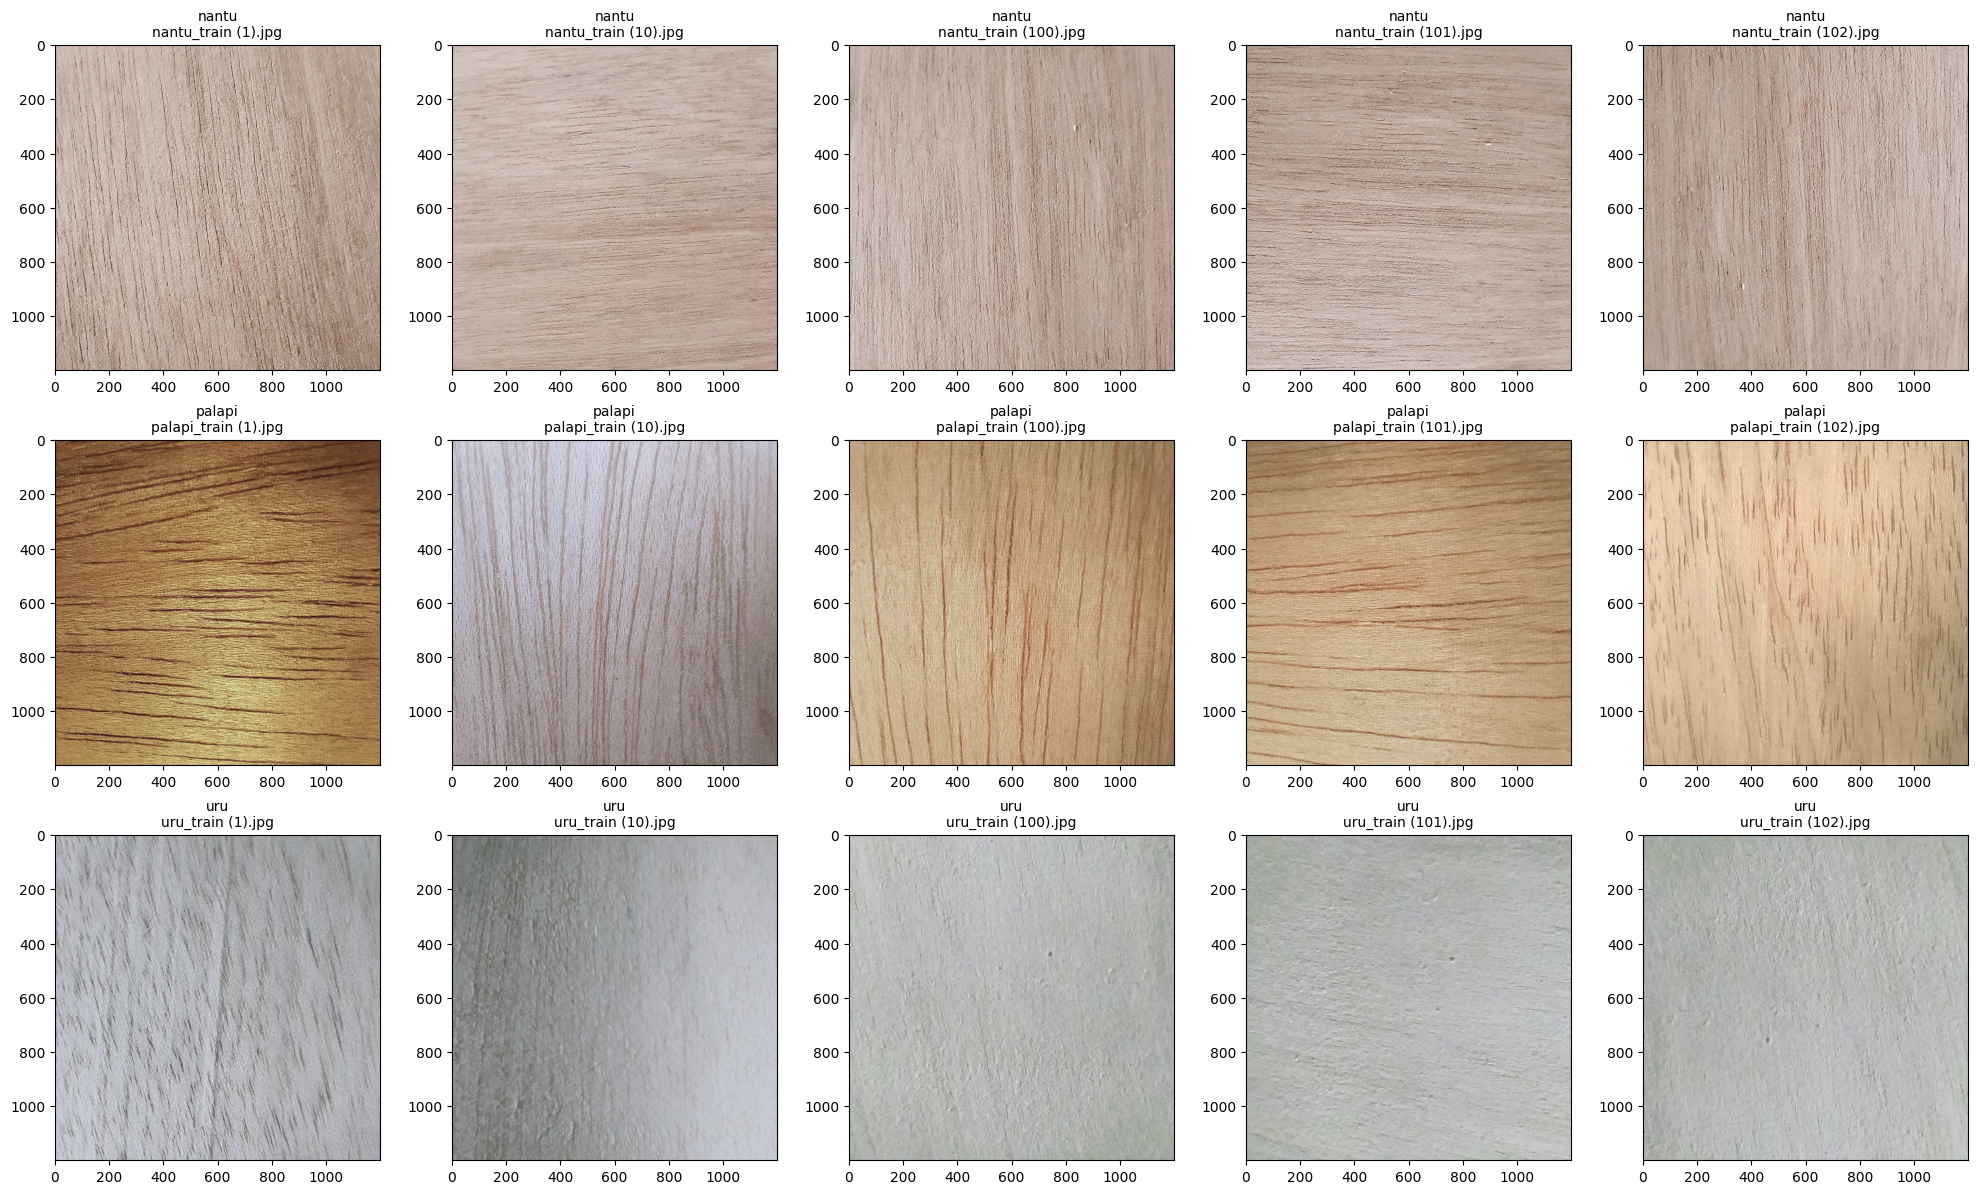

In [9]:
# Direktori dataset
dataset_path = 'serat_kayu'
categories = ['nantu', 'palapi', 'uru']

# Inisialisasi list untuk data, label, dan nama file
data = []
labels = []
file_names = []

# Loop melalui setiap kategori
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    
    # Loop melalui setiap file dalam folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Baca gambar menggunakan OpenCV
        image = cv2.imread(file_path)
        
        # Konversi dari BGR ke RGB (karena OpenCV membaca sebagai BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Tambahkan ke list
        data.append(image_rgb)
        labels.append(label)
        file_names.append(file_name)


# Menampilkan informasi dataset
print(f"Total gambar yang di-load: {len(data)}")
print(f"Kategori: {categories}")

# Menampilkan 5 sampel gambar per label
def show_samples_per_class(n_samples=5):
    plt.figure(figsize=(4 * n_samples, 4 * len(categories)))
    labels_arr = np.array(labels)
    for i, category in enumerate(categories):
        # Cari indeks untuk kelas ini
        idxs = np.where(labels_arr == i)[0][:n_samples]
        for j, idx in enumerate(idxs):
            plt.subplot(len(categories), n_samples, i * n_samples + j + 1)
            plt.imshow(data[idx])
            plt.title(f"{category}\n{file_names[idx]}", fontsize=10)

    plt.tight_layout()
    plt.show()

show_samples_per_class(n_samples=5)

# Data Understanding

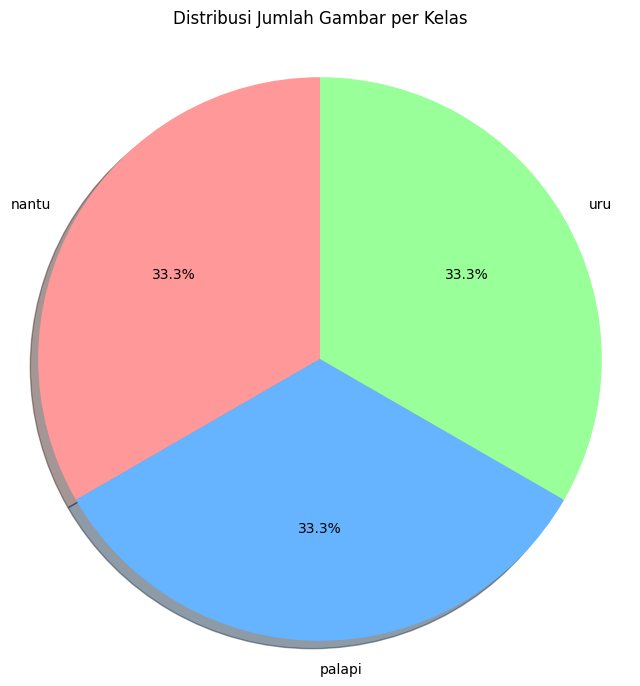


ANALISIS UKURAN GAMBAR:

NANTU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

PALAPI:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

URU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]


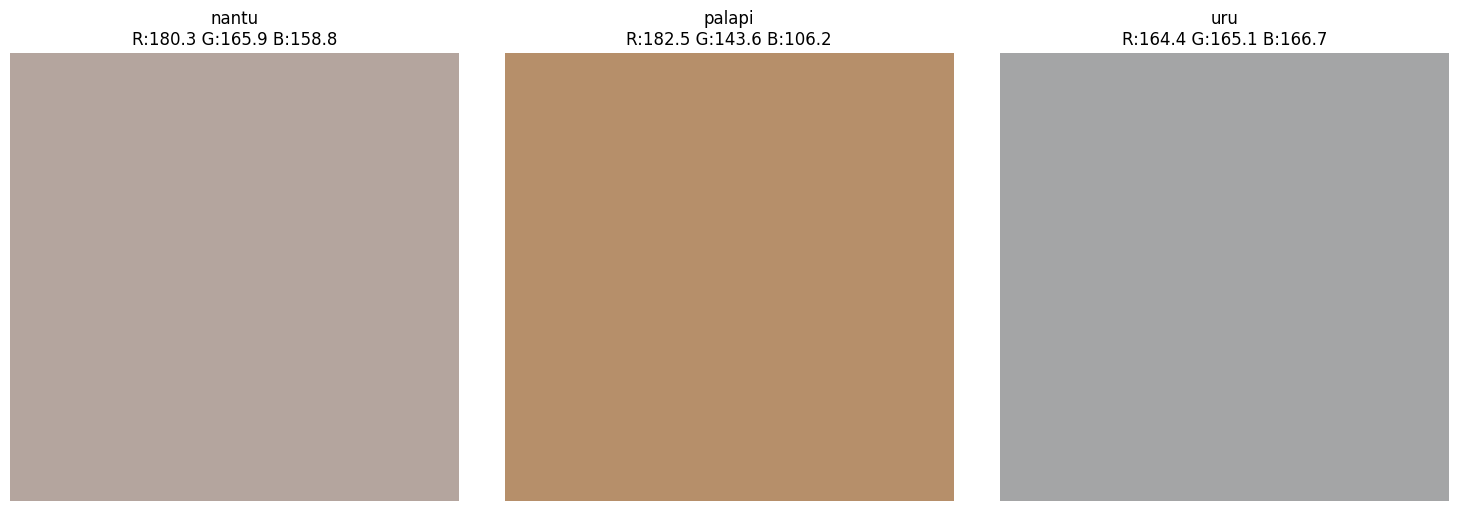

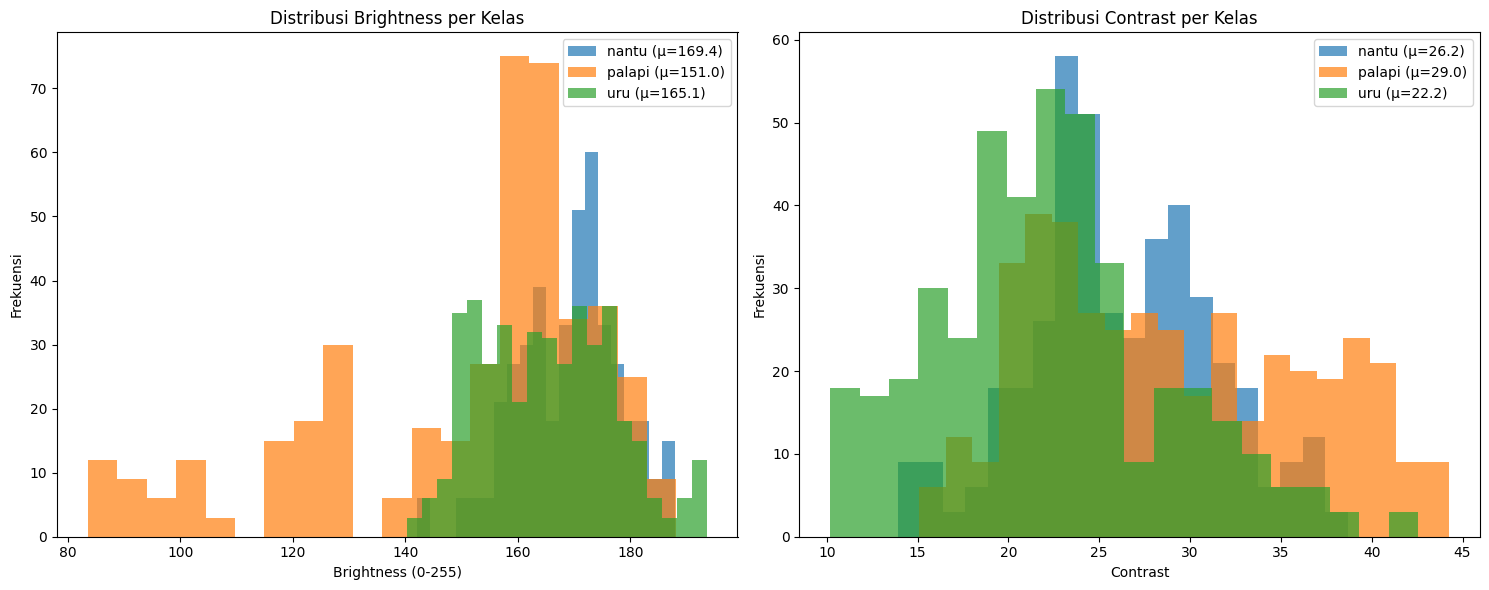

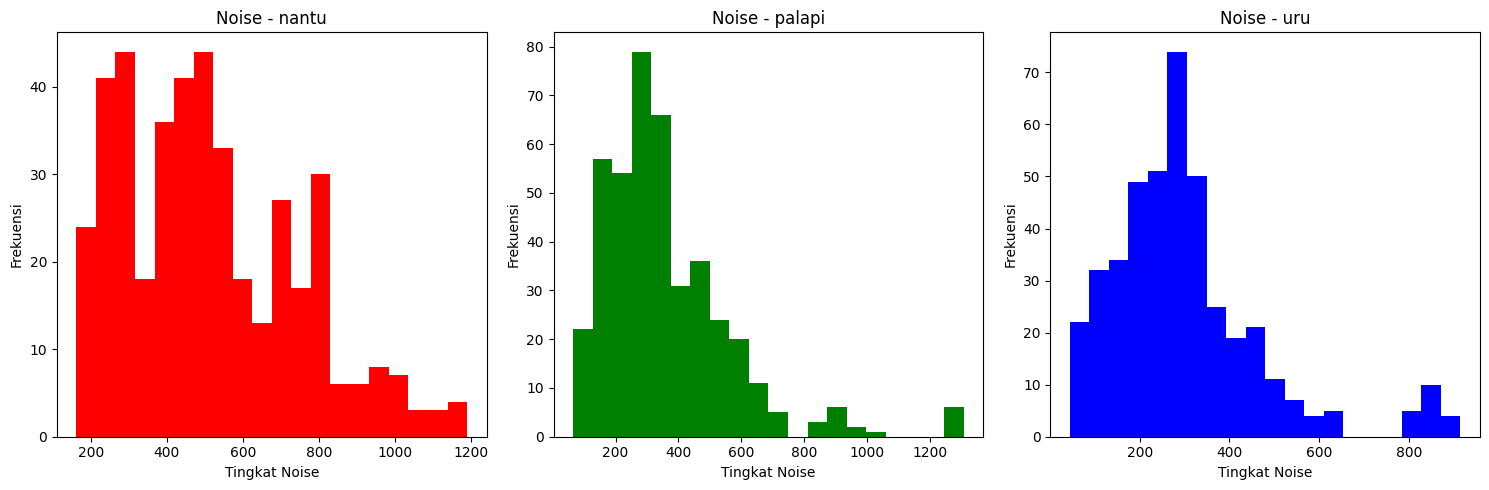


ANALISIS STATISTIK PER KELAS:

NANTU:
  Jumlah Sample: 423
  Warna Rata-rata - R:180.3 G:165.9 B:158.8
  Brightness - μ:169.4 σ:9.0
  Contrast - μ:26.2 σ:5.1
  Noise - μ:513.3 σ:230.6

PALAPI:
  Jumlah Sample: 423
  Warna Rata-rata - R:182.5 G:143.6 B:106.2
  Brightness - μ:151.0 σ:25.3
  Contrast - μ:29.0 σ:7.4
  Noise - μ:358.5 σ:206.4

URU:
  Jumlah Sample: 423
  Warna Rata-rata - R:164.4 G:165.1 B:166.7
  Brightness - μ:165.1 σ:11.8
  Contrast - μ:22.2 σ:6.4
  Noise - μ:299.7 σ:169.3


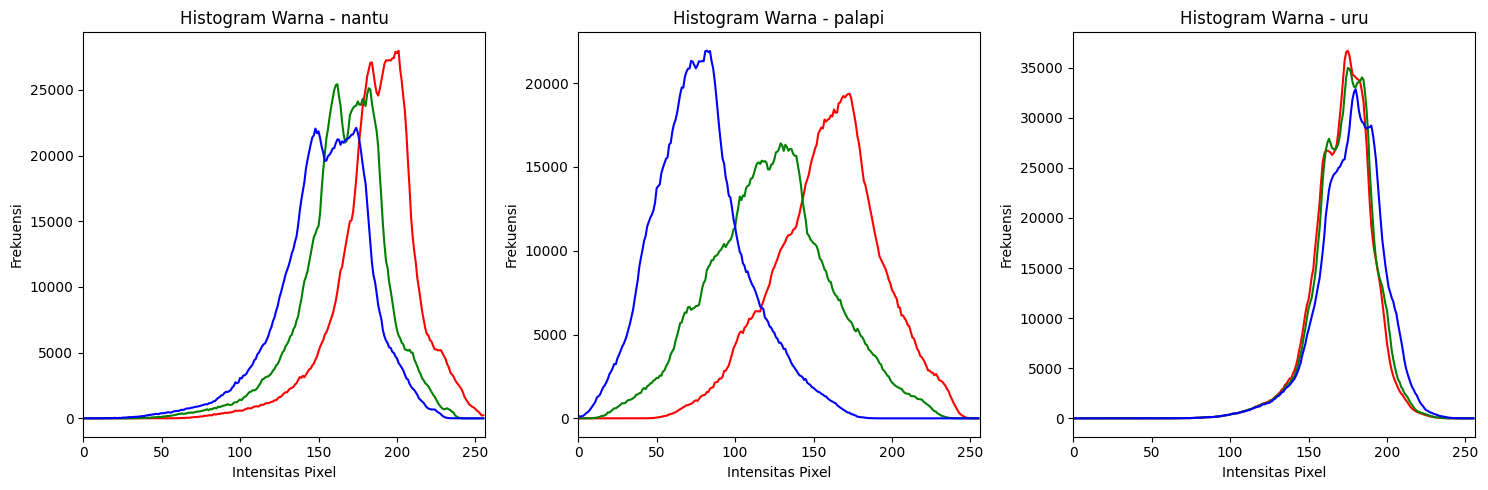

In [10]:
# ANALISIS DISTRIBUSI DATA (PIE CHART)

unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'],
        startangle=90, shadow=True)
plt.title('Distribusi Jumlah Gambar per Kelas', pad=20)
plt.axis('equal')
plt.show()


# ANALISIS RATA-RATA WARNA (3 BERJEJER)

def display_average_colors(color_means, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    color_means = np.array(color_means)
    
    for i, class_name in enumerate(categories):
        class_color_means = color_means[labels_arr == i]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name.upper()}\nR: {avg_rgb[0]:.1f} - G: {avg_rgb[1]:.1f} - B: {avg_rgb[2]:.1f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# ANALISIS UKURAN GAMBAR

def analyze_image_sizes(images, labels_arr, categories):
    shapes = np.array([img.shape[:2] for img in images])
    
    # Info numerik
    print("\nANALISIS UKURAN GAMBAR:")
    print("=======================")
    for i, class_name in enumerate(categories):
        class_shapes = shapes[labels_arr == i]
        print(f"\n{class_name.upper()}:")
        print(f"  Resolusi rata-rata: {np.mean(class_shapes, axis=0).astype(int)} (P x L)")
        print(f"  Ukuran minimum: {np.min(class_shapes, axis=0)}")
        print(f"  Ukuran maksimum: {np.max(class_shapes, axis=0)}")

labels_arr = np.array(labels)
analyze_image_sizes(data, labels_arr, categories)

# ANALISIS KARAKTERISTIK VISUAL

def analyze_image_properties(images, labels_arr, categories):
    brightness_values = []
    contrast_values = []
    color_means = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        brightness_values.append(np.mean(gray))
        contrast_values.append(np.std(gray))
        color_means.append(np.mean(img, axis=(0,1)))
    
    brightness_values = np.array(brightness_values)
    contrast_values = np.array(contrast_values)
    color_means = np.array(color_means)
    
    labels_arr = np.array(labels_arr)
    
    
    # ANALISIS RATA-RATA WARNA PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        class_color_means = color_means[class_indices]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name}\nR:{avg_rgb[0]:.1f} G:{avg_rgb[1]:.1f} B:{avg_rgb[2]:.1f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS BRIGHTNESS DAN CONTRAST
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Brightness
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax1.hist(brightness_values[class_indices], bins=20, alpha=0.7, 
                label=f'{class_name} (μ={np.mean(brightness_values[class_indices]):.1f})')
    ax1.set_title('Distribusi Brightness per Kelas')
    ax1.set_xlabel('Brightness (0-255)')
    ax1.set_ylabel('Frekuensi')
    ax1.legend()
    
    # Contrast
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax2.hist(contrast_values[class_indices], bins=20, alpha=0.7,
                label=f'{class_name} (μ={np.mean(contrast_values[class_indices]):.1f})')
    ax2.set_title('Distribusi Contrast per Kelas')
    ax2.set_xlabel('Contrast')
    ax2.set_ylabel('Frekuensi')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS NOISE PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        noise_levels = []
        
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise = cv2.Laplacian(gray, cv2.CV_64F).var()
            noise_levels.append(noise)
        
        plt.subplot(1, 3, i+1)
        plt.hist(noise_levels, bins=20, color=['red','green','blue'][i])
        plt.title(f'Noise - {class_name}')
        plt.xlabel('Tingkat Noise')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()
    
    
    # STATISTIKNYA
    
    print("\nANALISIS STATISTIK PER KELAS:")
    print("============================")
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        
        # Calculate properties
        class_brightness = brightness_values[class_indices]
        class_contrast = contrast_values[class_indices]
        class_colors = color_means[class_indices]
        
        # Calculate noise
        noise_levels = []
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise_levels.append(cv2.Laplacian(gray, cv2.CV_64F).var())
        
        print(f"\n{class_name.upper()}:")
        print(f"  Jumlah Sample: {len(class_indices)}")
        print(f"  Warna Rata-rata - R:{np.mean(class_colors[:,0]):.1f} G:{np.mean(class_colors[:,1]):.1f} B:{np.mean(class_colors[:,2]):.1f}")
        print(f"  Brightness - μ:{np.mean(class_brightness):.1f} σ:{np.std(class_brightness):.1f}")
        print(f"  Contrast - μ:{np.mean(class_contrast):.1f} σ:{np.std(class_contrast):.1f}")
        print(f"  Noise - μ:{np.mean(noise_levels):.1f} σ:{np.std(noise_levels):.1f}")

analyze_image_properties(data, labels_arr, categories)

# ANALISIS HISTOGRAM WARNA

def analyze_color_histograms(images, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    
    for i, class_name in enumerate(categories):
        class_images = [img for img, label in zip(images, labels_arr) if label == i]
        if not class_images:
            continue
        sample_img = class_images[0]
        
        plt.subplot(1, 3, i+1)
        for j, color in enumerate(['red', 'green', 'blue']):
            hist = cv2.calcHist([sample_img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        
        plt.title(f'Histogram Warna - {class_name}')
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()

analyze_color_histograms(data, labels_arr, categories)

# Percobaan 1

In [19]:
# Fungsi manual untuk konversi ke grayscale (weighted method)
def rgb_to_grayscale(img):
    # Weighted method: 0.299*R + 0.587*G + 0.114*B
    gray = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]
    return gray.astype(np.uint8)

# Fungsi manual untuk histogram equalization
def manual_hist_equalize(gray_img):
    hist, bins = np.histogram(gray_img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    equalized = np.interp(gray_img.flatten(), bins[:-1], cdf_normalized)
    return equalized.reshape(gray_img.shape).astype(np.uint8)

# Fungsi manual untuk Gaussian blur
def manual_gaussian_blur(img, kernel_size=3, sigma=1):
    # Buat kernel Gaussian
    kernel = np.zeros((kernel_size, kernel_size))
    k = kernel_size // 2
    for i in range(-k, k+1):
        for j in range(-k, k+1):
            kernel[i+k, j+k] = np.exp(-(i**2 + j**2)/(2*sigma**2))
    kernel /= kernel.sum()
    
    # Aplikasikan konvolusi
    pad = k
    padded = np.pad(img, pad, mode='reflect')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i,j] = np.sum(padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output.astype(np.uint8)

# Fungsi manual untuk Sobel edge detection
def manual_sobel_edge(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    pad = 1
    padded = np.pad(img, pad, mode='reflect')
    grad_x = np.zeros_like(img, dtype=np.float64)
    grad_y = np.zeros_like(img, dtype=np.float64)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            grad_x[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_x)
            grad_y[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_y)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)
    return magnitude

# Fungsi manual untuk CLAHE
def manual_clahe(img, clip_limit=2.0, tile_size=8):
    h, w = img.shape
    tiles_y = h // tile_size
    tiles_x = w // tile_size
    
    # Proses setiap tile
    output = np.zeros_like(img)
    
    for i in range(tiles_y):
        for j in range(tiles_x):
            # Ekstrak tile
            y_start = i * tile_size
            y_end = (i+1) * tile_size if (i+1) * tile_size <= h else h
            x_start = j * tile_size
            x_end = (j+1) * tile_size if (j+1) * tile_size <= w else w
            
            tile = img[y_start:y_end, x_start:x_end]
            
            # Hitung histogram dan lakukan clipping
            hist, _ = np.histogram(tile.flatten(), 256, [0,256])
            excess = np.sum(np.maximum(hist - clip_limit * hist.mean(), 0))
            hist = np.minimum(hist, clip_limit * hist.mean() + excess/256)
            
            # Hitung CDF dan normalisasi
            cdf = hist.cumsum()
            cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            
            # Transformasi tile
            tile_equalized = np.interp(tile.flatten(), np.arange(256), cdf)
            output[y_start:y_end, x_start:x_end] = tile_equalized.reshape(tile.shape)
    
    return output.astype(np.uint8)

# Fungsi manual untuk morphological gradient
def manual_morph_gradient(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    pad = kernel_size // 2
    padded = np.pad(img, pad, mode='reflect')
    
    dilated = np.zeros_like(img)
    eroded = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
            dilated[i,j] = np.max(neighborhood)
            eroded[i,j] = np.min(neighborhood)
    
    return dilated - eroded

# Fungsi resize manual (nearest neighbor)
def manual_resize(img, new_size=(512, 512)):
    h, w = img.shape[:2]
    new_h, new_w = new_size
    
    # Untuk grayscale
    if len(img.shape) == 2:
        resized = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                src_i = int(i * h / new_h)
                src_j = int(j * w / new_w)
                resized[i,j] = img[src_i, src_j]
    else:
        # Untuk warna (tidak digunakan di sini)
        resized = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                src_i = int(i * h / new_h)
                src_j = int(j * w / new_w)
                resized[i,j] = img[src_i, src_j]
    
    return resized

# Fungsi Preprocessing 1: Grayscale -> Resize -> Histogram Equalization
def preprocess_1_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray)
    
    # Histogram equalization manual
    equalized = manual_hist_equalize(resized)
    
    return equalized

# Fungsi Preprocessing 2: Grayscale -> Resize -> Hist Equal -> Gaussian Blur -> Edge Detection
def preprocess_2_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray)
    
    # Histogram equalization manual
    equalized = manual_hist_equalize(resized)
    
    # Gaussian blur manual
    blurred = manual_gaussian_blur(equalized)
    
    # Edge detection manual
    edges = manual_sobel_edge(blurred)
    
    return edges

# Fungsi Preprocessing 3: Grayscale -> Resize -> CLAHE -> Gaussian Blur -> Morph Gradient
def preprocess_3_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray)
    
    # CLAHE manual
    clahe_img = manual_clahe(resized)
    
    # Gaussian blur manual
    blurred = manual_gaussian_blur(clahe_img)
    
    # Morphological gradient manual
    morph = manual_morph_gradient(blurred)
    
    return morph

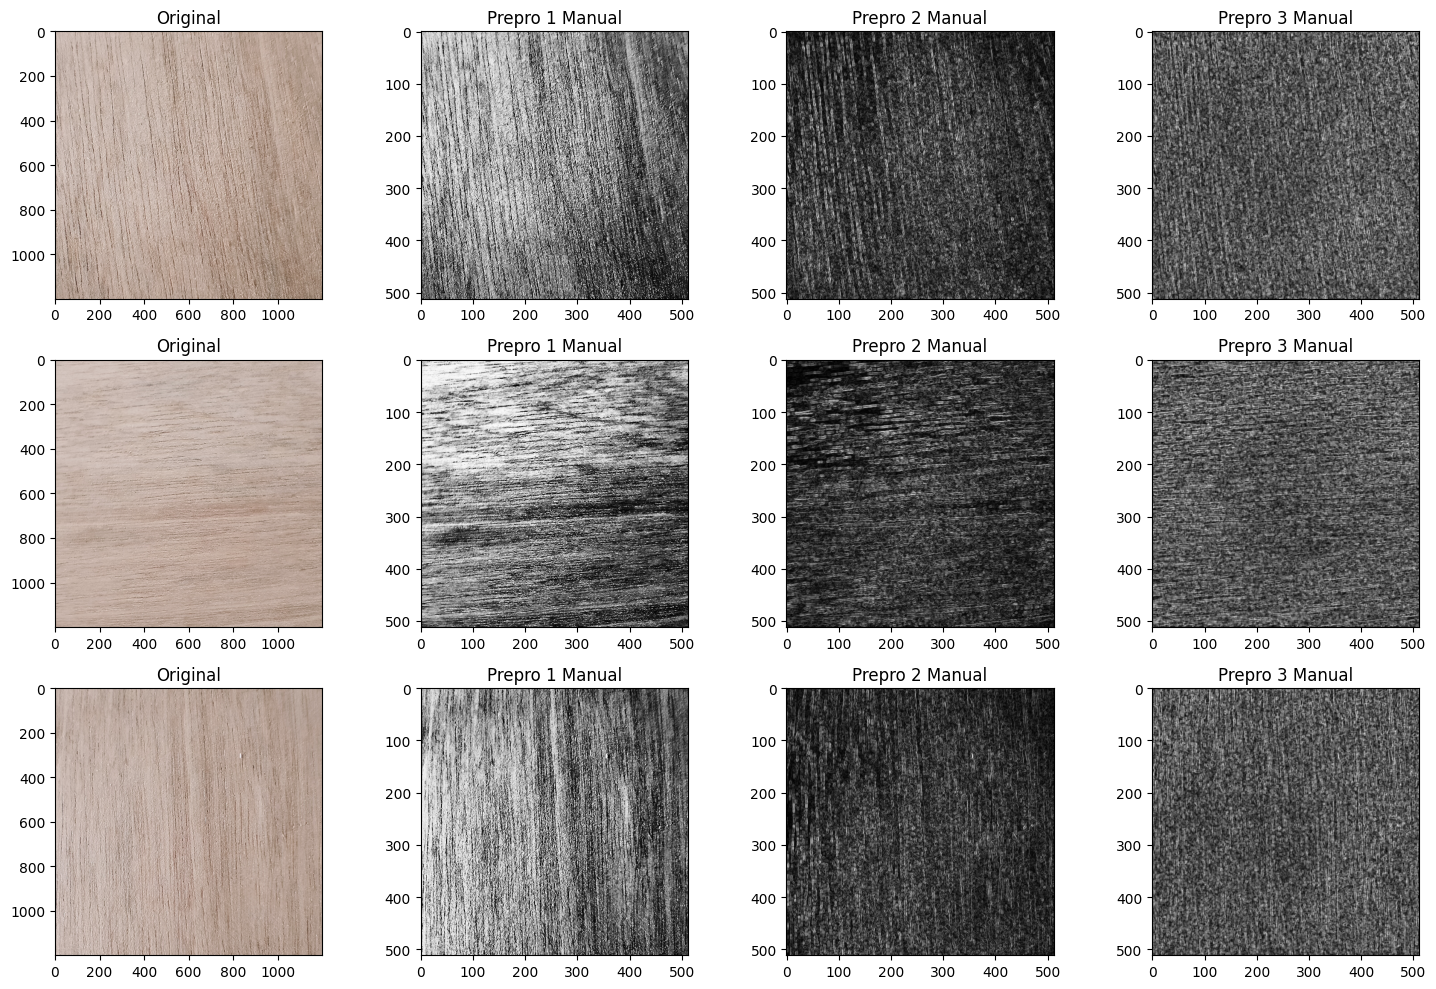

In [20]:
# Terapkan preprocessing manual ke seluruh dataset
hasil_prepro_1_manual = np.array([preprocess_1_manual(img) for img in data])
hasil_prepro_2_manual = np.array([preprocess_2_manual(img) for img in data])
hasil_prepro_3_manual = np.array([preprocess_3_manual(img) for img in data])

# Contoh visualisasi hasil preprocessing manual
plt.figure(figsize=(15,10))
for i in range(3):  # Tampilkan 3 sampel pertama
    plt.subplot(3, 4, i*4+1)
    plt.imshow(data[i])
    plt.title('Original')
    
    plt.subplot(3, 4, i*4+2)
    plt.imshow(hasil_prepro_1_manual[i], cmap='gray')
    plt.title('Prepro 1 Manual')
    
    plt.subplot(3, 4, i*4+3)
    plt.imshow(hasil_prepro_2_manual[i], cmap='gray')
    plt.title('Prepro 2 Manual')
    
    plt.subplot(3, 4, i*4+4)
    plt.imshow(hasil_prepro_3_manual[i], cmap='gray')
    plt.title('Prepro 3 Manual')

plt.tight_layout()
plt.show()

In [21]:
# 1. Fungsi untuk menghitung GLCM manual
def calculate_glcm(image, distances, angles, levels=256):
    """
    Menghitung Gray-Level Co-occurrence Matrix (GLCM) secara manual
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel (misal [1, 2, 3])
        angles: List sudut dalam radian (misal [0, np.pi/4, np.pi/2, 3*np.pi/4])
        levels: Jumlah level intensitas (default 256)
    
    Returns:
        Dictionary dengan key (distance, angle) dan value GLCM matrix
    """
    glcm_results = {}
    height, width = image.shape
    
    for d in distances:
        for angle in angles:
            # Inisialisasi matrix GLCM
            glcm = np.zeros((levels, levels), dtype=np.uint32)
            
            # Hitung offset berdasarkan angle
            if angle == 0:  # 0°
                dx, dy = d, 0
            elif angle == np.pi/4:  # 45°
                dx, dy = d, -d
            elif angle == np.pi/2:  # 90°
                dx, dy = 0, -d
            elif angle == 3*np.pi/4:  # 135°
                dx, dy = -d, -d
            else:
                raise ValueError("Angle not supported")
            
            # Bangun GLCM
            for i in range(height):
                for j in range(width):
                    # Cek boundary
                    if 0 <= i + dx < height and 0 <= j + dy < width:
                        pixel_val = image[i, j]
                        neighbor_val = image[i + dx, j + dy]
                        glcm[pixel_val, neighbor_val] += 1
            
            # Normalisasi GLCM
            glcm = glcm.astype(np.float32)
            if glcm.sum() > 0:
                glcm /= glcm.sum()
            
            glcm_results[(d, angle)] = glcm
    
    return glcm_results

# 2. Fungsi untuk menghitung fitur tekstur dari GLCM
def compute_texture_features(glcm_matrix):
    """
    Menghitung berbagai fitur tekstur dari GLCM
    
    Parameters:
        glcm_matrix: Matrix GLCM yang sudah dinormalisasi
    
    Returns:
        Dictionary berisi fitur-fitur tekstur
    """
    features = {}
    levels = glcm_matrix.shape[0]
    
    # Inisialisasi array untuk perhitungan
    i, j = np.indices((levels, levels))
    
    # 1. Contrast
    contrast = np.sum(glcm_matrix * (i - j)**2)
    features['contrast'] = contrast
    
    # 2. Dissimilarity
    dissimilarity = np.sum(glcm_matrix * np.abs(i - j))
    features['dissimilarity'] = dissimilarity
    
    # 3. Homogeneity
    homogeneity = np.sum(glcm_matrix / (1 + (i - j)**2))
    features['homogeneity'] = homogeneity
    
    # 4. Energy (ASM)
    asm = np.sum(glcm_matrix**2)
    features['energy'] = np.sqrt(asm)
    
    # 5. Entropy
    entropy = -np.sum(glcm_matrix * np.log(glcm_matrix + (glcm_matrix == 0)))
    features['entropy'] = entropy
    
    # 6. Correlation
    # Hitung mean dan std dev
    mean_i = np.sum(i * glcm_matrix)
    mean_j = np.sum(j * glcm_matrix)
    
    std_i = np.sqrt(np.sum((i - mean_i)**2 * glcm_matrix))
    std_j = np.sqrt(np.sum((j - mean_j)**2 * glcm_matrix))
    
    if std_i > 0 and std_j > 0:
        correlation = np.sum(glcm_matrix * (i - mean_i) * (j - mean_j)) / (std_i * std_j)
    else:
        correlation = 0
    features['correlation'] = correlation
    
    return features

# 3. Fungsi ekstraksi fitur dari gambar
def extract_features(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    """
    Ekstraksi fitur GLCM dari sebuah gambar
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel
        angles: List sudut dalam radian
    
    Returns:
        Dictionary berisi semua fitur untuk semua kombinasi distance dan angle
    """
    # Hitung GLCM
    glcm_dict = calculate_glcm(image, distances, angles)
    
    # Hitung fitur untuk setiap GLCM
    all_features = {}
    for (d, angle), glcm in glcm_dict.items():
        angle_deg = int(np.degrees(angle))
        prefix = f"d{d}_a{angle_deg}"
        
        features = compute_texture_features(glcm)
        for name, value in features.items():
            all_features[f"{prefix}_{name}"] = value
    
    return all_features

# 4. Fungsi seleksi fitur
def select_features(feature_list, variance_threshold=0.01):
    """
    Seleksi fitur berdasarkan variance threshold
    
    Parameters:
        feature_list: List of dictionaries (fitur untuk setiap sampel)
        variance_threshold: Threshold variance untuk seleksi
    
    Returns:
        selected_features: List nama fitur yang terpilih
        selected_indices: Indices fitur yang terpilih
    """
    # Konversi ke array numpy
    feature_names = list(feature_list[0].keys())
    num_samples = len(feature_list)
    num_features = len(feature_names)
    
    feature_matrix = np.zeros((num_samples, num_features))
    for i, sample in enumerate(feature_list):
        feature_matrix[i] = [sample[name] for name in feature_names]
    
    # Hitung variance setiap fitur
    variances = np.var(feature_matrix, axis=0)
    
    # Seleksi fitur
    selected_indices = np.where(variances > variance_threshold)[0]
    selected_features = [feature_names[i] for i in selected_indices]
    
    return selected_features, selected_indices

In [22]:
# 5. Penerapan pada semua hasil preprocessing
# Parameter GLCM
distances = [1, 2]  # Jarak pixel
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut

# Untuk menyimpan hasil
feature_results = {
    'prepro1': {'X': None, 'features': None},
    'prepro2': {'X': None, 'features': None},
    'prepro3': {'X': None, 'features': None}
}

# Proses Preprocessing 1
print("Memproses Preprocessing 1...")
features_prepro1 = [extract_features(img, distances, angles) for img in hasil_prepro_1_manual]
selected_features_prepro1, _ = select_features(features_prepro1)
X_prepro1 = np.array([[sample[feat] for feat in selected_features_prepro1] for sample in features_prepro1])
feature_results['prepro1']['X'] = X_prepro1
feature_results['prepro1']['features'] = selected_features_prepro1

# Proses Preprocessing 2
print("Memproses Preprocessing 2...")
features_prepro2 = [extract_features(img, distances, angles) for img in hasil_prepro_2_manual]
selected_features_prepro2, _ = select_features(features_prepro2)
X_prepro2 = np.array([[sample[feat] for feat in selected_features_prepro2] for sample in features_prepro2])
feature_results['prepro2']['X'] = X_prepro2
feature_results['prepro2']['features'] = selected_features_prepro2

# Proses Preprocessing 3
print("Memproses Preprocessing 3...")
features_prepro3 = [extract_features(img, distances, angles) for img in hasil_prepro_3_manual]
selected_features_prepro3, _ = select_features(features_prepro3)
X_prepro3 = np.array([[sample[feat] for feat in selected_features_prepro3] for sample in features_prepro3])
feature_results['prepro3']['X'] = X_prepro3
feature_results['prepro3']['features'] = selected_features_prepro3

# Cetak hasil
print("\nHasil Ekstraksi Fitur:")
for prepro in ['prepro1', 'prepro2', 'prepro3']:
    print(f"{prepro}:")
    print(f"  Jumlah fitur terpilih: {len(feature_results[prepro]['features'])}")
    print(f"  Dimensi matriks fitur: {feature_results[prepro]['X'].shape}")
    print(f"  5 fitur pertama: {feature_results[prepro]['features'][:5]}\n")

Memproses Preprocessing 1...
Memproses Preprocessing 2...
Memproses Preprocessing 3...

Hasil Ekstraksi Fitur:
prepro1:
  Jumlah fitur terpilih: 32
  Dimensi matriks fitur: (1269, 32)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']

prepro2:
  Jumlah fitur terpilih: 28
  Dimensi matriks fitur: (1269, 28)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']

prepro3:
  Jumlah fitur terpilih: 28
  Dimensi matriks fitur: (1269, 28)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']



In [23]:
import numpy as np

def manual_train_test_split(X, y, test_size=0.2):
    """
    Manual train-test split that maintains class distribution
    
    Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Labels (n_samples,)
        test_size: Proportion for test set (default 0.2)
    
    Returns:
        X_train, X_test, y_train, y_test
    """
    # Get unique classes
    classes = np.unique(y)
    X_train, X_test, y_train, y_test = [], [], [], []
    
    for cls in classes:
        # Get indices for current class
        cls_indices = np.where(y == cls)[0]
        
        # Shuffle indices
        np.random.shuffle(cls_indices)
        
        # Calculate split point
        split_idx = int(len(cls_indices) * (1 - test_size))
        
        # Split for this class
        X_train.extend(X[cls_indices[:split_idx]])
        X_test.extend(X[cls_indices[split_idx:]])
        y_train.extend(y[cls_indices[:split_idx]])
        y_test.extend(y[cls_indices[split_idx:]])
    
    # Convert to numpy arrays
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Usage for each preprocessing pipeline (using your feature_results)
for prepro in ['prepro1', 'prepro2', 'prepro3']:
    print(f"\nSplitting data for {prepro}...")
    
    # Get features and labels
    X = feature_results[prepro]['X']
    y = np.array(labels)  # Using your existing labels
    
    # Perform the split (80-20)
    X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2)
    
    # Store results back in feature_results
    feature_results[prepro]['X_train'] = X_train
    feature_results[prepro]['X_test'] = X_test
    feature_results[prepro]['y_train'] = y_train
    feature_results[prepro]['y_test'] = y_test
    
    # Print statistics
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print("Class distribution in training set:", np.unique(y_train, return_counts=True))
    print("Class distribution in test set:", np.unique(y_test, return_counts=True))


Splitting data for prepro1...
Training set: 1014 samples
Test set: 255 samples
Class distribution in training set: (array([0, 1, 2]), array([338, 338, 338]))
Class distribution in test set: (array([0, 1, 2]), array([85, 85, 85]))

Splitting data for prepro2...
Training set: 1014 samples
Test set: 255 samples
Class distribution in training set: (array([0, 1, 2]), array([338, 338, 338]))
Class distribution in test set: (array([0, 1, 2]), array([85, 85, 85]))

Splitting data for prepro3...
Training set: 1014 samples
Test set: 255 samples
Class distribution in training set: (array([0, 1, 2]), array([338, 338, 338]))
Class distribution in test set: (array([0, 1, 2]), array([85, 85, 85]))


In [25]:
import numpy as np
from collections import Counter

# 1. Manual KNN Implementation
class ManualKNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [np.sqrt(np.sum((test_point - train_point)**2)) 
                         for train_point in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# 2. Manual SVM Implementation (Linear Kernel)
class ManualSVM:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.weights / self.n_iters)
                else:
                    self.weights -= self.lr * (2 * self.weights / self.n_iters - np.dot(x_i, y_[idx]))
                    self.bias += self.lr * y_[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# 3. Manual Decision Tree
class ManualDecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        
    def _best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gini = float('inf')
        
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_idx
                    best_threshold = threshold
        return best_feature, best_threshold
    
    def _gini_impurity(self, left_y, right_y):
        def _gini(y):
            classes = np.unique(y)
            impurity = 1
            for cls in classes:
                p = np.sum(y == cls) / len(y)
                impurity -= p ** 2
            return impurity
        
        total = len(left_y) + len(right_y)
        return (len(left_y) / total) * _gini(left_y) + (len(right_y) / total) * _gini(right_y)
    
    def fit(self, X, y, depth=0):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        self.feature, self.threshold = self._best_split(X, y)
        if self.feature is None:
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        left_indices = X[:, self.feature] <= self.threshold
        right_indices = ~left_indices
        
        self.left = ManualDecisionTree(self.max_depth)
        self.left.fit(X[left_indices], y[left_indices], depth + 1)
        
        self.right = ManualDecisionTree(self.max_depth)
        self.right.fit(X[right_indices], y[right_indices], depth + 1)
    
    def predict(self, X):
        if hasattr(self, 'label'):
            return np.array([self.label] * len(X))
        
        left_indices = X[:, self.feature] <= self.threshold
        right_indices = ~left_indices
        
        y_pred = np.empty(len(X), dtype=int)
        y_pred[left_indices] = self.left.predict(X[left_indices])
        y_pred[right_indices] = self.right.predict(X[right_indices])
        return y_pred

# 4. Manual Random Forest
class ManualRandomForest:
    def __init__(self, n_trees=10, max_depth=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = ManualDecisionTree(self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        final_preds = []
        for i in range(len(X)):
            final_preds.append(Counter(predictions[:, i]).most_common(1)[0][0])
        return np.array(final_preds)

# 5. Evaluation Metrics
def evaluate(y_true, y_pred):
    classes = np.unique(y_true)
    metrics = {'accuracy': 0, 'precision': [], 'recall': [], 'f1': []}
    
    metrics['accuracy'] = np.sum(y_true == y_pred) / len(y_true)
    
    for cls in classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
    
    metrics['precision'] = np.mean(metrics['precision'])
    metrics['recall'] = np.mean(metrics['recall'])
    metrics['f1'] = np.mean(metrics['f1'])
    
    return metrics

# 6. Main Evaluation
results = []

for prepro in ['prepro1', 'prepro2', 'prepro3']:
    X_train = feature_results[prepro]['X_train']
    y_train = feature_results[prepro]['y_train']
    X_test = feature_results[prepro]['X_test']
    y_test = feature_results[prepro]['y_test']
    
    # KNN
    knn = ManualKNN(k=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_metrics = evaluate(y_test, y_pred)
    results.append(('KNN', prepro, knn_metrics))
    
    # SVM
    svm_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
    unique_classes = np.unique(y_train)
    
    if len(unique_classes) == 2:
        svm = ManualSVM()
        y_binary = np.where(y_train == unique_classes[1], 1, -1)
        svm.fit(X_train, y_binary)
        y_pred = svm.predict(X_test)
        y_pred = np.where(y_pred == 1, unique_classes[1], unique_classes[0])
        svm_metrics = evaluate(y_test, y_pred)
    else:
        # Multi-class One-vs-Rest
        scores = np.zeros((len(X_test), len(unique_classes)))
        for i, cls in enumerate(unique_classes):
            svm = ManualSVM()
            y_binary = np.where(y_train == cls, 1, -1)
            svm.fit(X_train, y_binary)
            pred = svm.predict(X_test)
            scores[:, i] = pred  # save signed score
        
        pred_indices = np.argmax(scores, axis=1)
        y_pred = unique_classes[pred_indices]
        svm_metrics = evaluate(y_test, y_pred)
    
    results.append(('SVM', prepro, svm_metrics))
    
    # Random Forest
    rf = ManualRandomForest(n_trees=10, max_depth=5)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_metrics = evaluate(y_test, y_pred)
    results.append(('Random Forest', prepro, rf_metrics))

# 7. Display Results
print("Results:")
print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Classifier", "Prepro", "Accuracy", "Precision", "Recall", "F1"))
print("-"*65)
for clf, prepro, metric in results:
    print("{:<15} {:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        clf, prepro, 
        metric['accuracy'], 
        metric['precision'], 
        metric['recall'], 
        metric['f1']))


Results:
Classifier      Prepro     Accuracy   Precision  Recall     F1        
-----------------------------------------------------------------
KNN             prepro1    0.8314     0.8318     0.8314     0.8301    
SVM             prepro1    0.3529     0.4467     0.3529     0.2062    
Random Forest   prepro1    0.6980     0.7165     0.6980     0.6975    
KNN             prepro2    0.8000     0.8176     0.8000     0.8019    
SVM             prepro2    0.3333     0.1111     0.3333     0.1667    
Random Forest   prepro2    0.7412     0.7544     0.7412     0.7393    
KNN             prepro3    0.8471     0.8461     0.8471     0.8463    
SVM             prepro3    0.3333     0.1111     0.3333     0.1667    
Random Forest   prepro3    0.8078     0.8288     0.8078     0.8056    
